# Importing Dependencies

In [7]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.vision import *
from fastai.metrics import error_rate

# Looking the Data

In [17]:
#importing data
images = '/storage/ML-Dataset/Weather Image'

In [18]:
tfms = get_transforms(do_flip=False)

In [19]:
data = ImageDataBunch.from_folder(images, ds_tfms=tfms,valid_pct=0.2 ,size = 224).normalize(imagenet_stats)

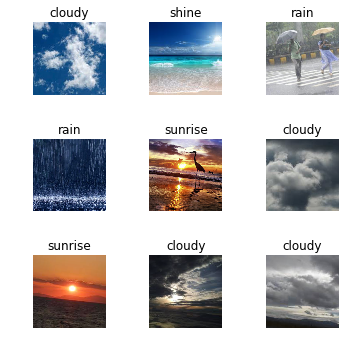

In [20]:
data.show_batch(3 , figsize = (5,5))

In [27]:
print(data.classes)
len(data.classes),data.c

['cloudy', 'rain', 'shine', 'sunrise']


(4, 4)

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.165211,0.195205,0.057778,00:11
1,0.655985,0.178579,0.053333,00:10
2,0.450366,0.166227,0.048889,00:10
3,0.329236,0.148615,0.044444,00:11


In [30]:
learn.save('stage1')

# Result

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

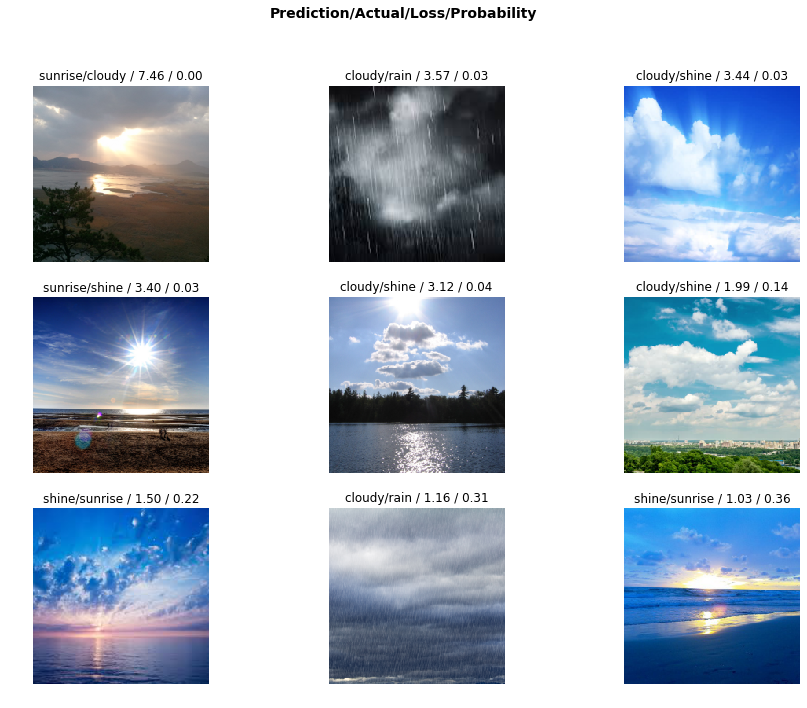

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

In [33]:
interp.most_confused()

[('shine', 'cloudy', 3),
 ('rain', 'cloudy', 2),
 ('sunrise', 'shine', 2),
 ('cloudy', 'sunrise', 1),
 ('rain', 'shine', 1),
 ('shine', 'sunrise', 1)]

# Unfreezing, fine-tuning, and learning rates


In [34]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.232272,0.572302,0.120000,00:11


In [36]:
learn.load('stage1');

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


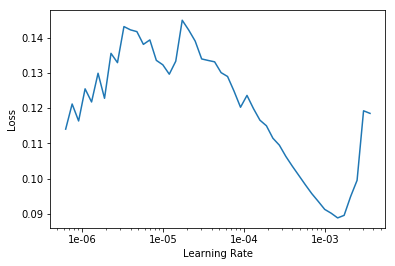

In [38]:
learn.recorder.plot()

In [40]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.068579,0.331388,0.044444,00:11
1,0.122052,0.232771,0.040000,00:10
2,0.097487,0.225824,0.035556,00:11
3,0.079897,0.182669,0.031111,00:11


In [41]:
accuracy = 100 - (0.031111*100)
accuracy

96.8889

# TRAINING RESNET 50

In [42]:
learn = cnn_learner(data , models.resnet50 ,metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


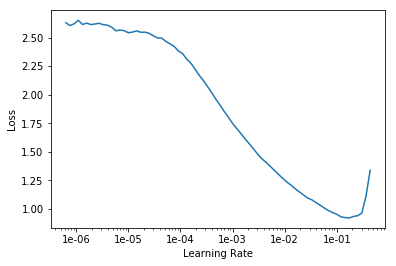

In [45]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.186303,0.162932,0.017778,00:10
1,0.168329,0.145130,0.017778,00:10
2,0.151908,0.127703,0.022222,00:10
3,0.131938,0.135354,0.017778,00:09
4,0.133438,0.150783,0.017778,00:10
5,0.125197,0.159360,0.017778,00:10
6,0.128214,0.135200,0.017778,00:10
7,0.112164,0.142866,0.017778,00:10


In [55]:
learn.fit_one_cycle(2 , max_lr = slice(1e-03, 3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.317561,0.164838,0.017778,00:10
1,0.216600,0.173010,0.017778,00:10


In [58]:
accuracy = 100 - (0.01778*100)
accuracy

98.222